In [2]:
### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
pet_df = pd.read_csv("/kaggle/input/petfinder-adoption-prediction/train/train.csv")
pet_df.reset_index(drop=True, inplace=True)
display(pet_df)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,NaN,2,266,0,3,1,0,0,2,...,1,4,0,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,...,1,2,0,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4
14990,2,Monkies,2,265,266,3,5,6,7,3,...,1,5,30,41326,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3
14991,2,Ms Daym,9,266,0,2,4,7,0,1,...,1,1,0,41336,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4


In [4]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV




In [5]:
#ensure we don't ruin the original dataset
pet_df_cp = pet_df.copy()
pet_df_cp.dtypes

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

We can see that most features are in int form, and have some variables like rescuerID that we need to translate if we don't end up getting rid of.

In [6]:
# replace all empty values to np.NaN values
pet_df_cp.replace('', np.NaN, inplace=True)
pet_df_cp.fillna(np.NaN, inplace=True)
pet_df_cp

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,NaN,2,266,0,3,1,0,0,2,...,1,4,0,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,...,1,2,0,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4
14990,2,Monkies,2,265,266,3,5,6,7,3,...,1,5,30,41326,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3
14991,2,Ms Daym,9,266,0,2,4,7,0,1,...,1,1,0,41336,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4


In [7]:
pet_df_cp.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


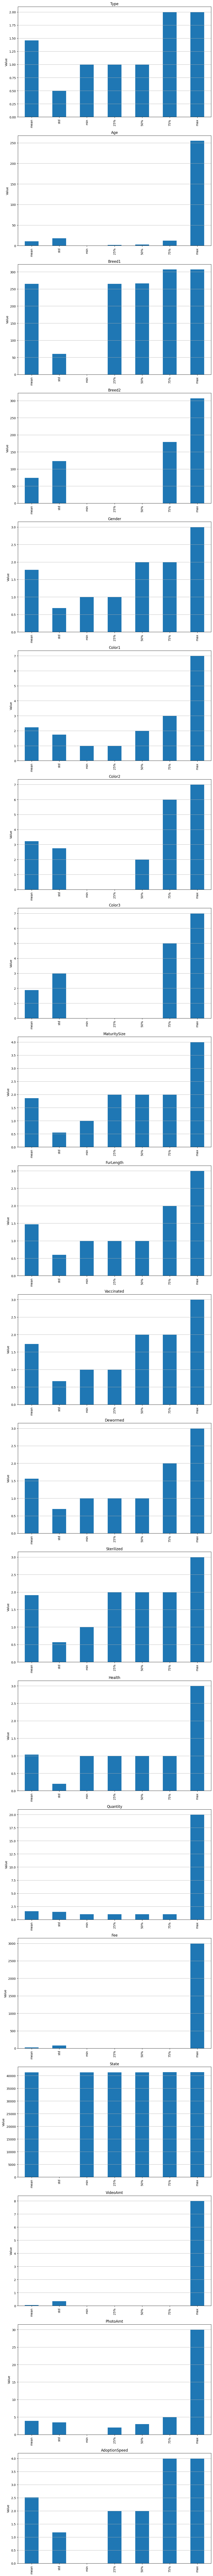

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming pet_df_cp is your DataFrame
# If your DataFrame contains only numerical columns, you can directly use describe()
description = pet_df_cp.describe()

# Drop 'count' row
description = description.drop('count')

# Plotting
fig, axes = plt.subplots(nrows=description.shape[1], ncols=1, figsize=(10, 6*description.shape[1]))

for i, col in enumerate(description.columns):
    description[col].plot(kind='bar', ax=axes[i], title=col)
    axes[i].set_ylabel('Value')
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()

In [9]:
# count empty values in each column
def count_empty_values_in_each_column(df):
    print('empty values:')
    code = "len(np.where(df[column].isnull())[0])"
    for column in df.columns:
        print(f'`{column}`: {eval(code)}')

count_empty_values_in_each_column(pet_df_cp)

empty values:
`Type`: 0
`Name`: 1265
`Age`: 0
`Breed1`: 0
`Breed2`: 0
`Gender`: 0
`Color1`: 0
`Color2`: 0
`Color3`: 0
`MaturitySize`: 0
`FurLength`: 0
`Vaccinated`: 0
`Dewormed`: 0
`Sterilized`: 0
`Health`: 0
`Quantity`: 0
`Fee`: 0
`State`: 0
`RescuerID`: 0
`VideoAmt`: 0
`Description`: 13
`PetID`: 0
`PhotoAmt`: 0
`AdoptionSpeed`: 0


In [10]:
pet_df_cp = pet_df_cp.drop(['Name', 'RescuerID', 'PetID', 'Description'], axis=1)
pet_df_cp

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,1.0,2
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,2.0,0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,7.0,3
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,8.0,2
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,2,266,0,3,1,0,0,2,2,2,2,2,1,4,0,41326,0,3.0,2
14989,2,60,265,264,3,1,4,7,2,2,1,1,1,1,2,0,41326,0,3.0,4
14990,2,2,265,266,3,5,6,7,3,2,2,1,3,1,5,30,41326,0,5.0,3
14991,2,9,266,0,2,4,7,0,1,1,1,1,1,1,1,0,41336,0,3.0,4


In [11]:
columns_to_drop = pet_df_cp.columns[pet_df_cp.max() > 10]

pet_df_plot_show = pet_df_cp.copy().drop(columns=columns_to_drop)
pet_df_plot_show

,Type,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,VideoAmt,AdoptionSpeed
0,2,1,1,7,0,1,1,2,2,2,1,0,2
1,2,1,1,2,0,2,2,3,3,3,1,0,0
2,1,1,2,7,0,2,2,1,1,2,1,0,3
3,1,2,1,2,0,2,1,1,1,2,1,0,2
4,1,1,1,0,0,2,1,2,2,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,3,1,0,0,2,2,2,2,2,1,0,2
14989,2,3,1,4,7,2,2,1,1,1,1,0,4
14990,2,3,5,6,7,3,2,2,1,3,1,0,3
14991,2,2,4,7,0,1,1,1,1,1,1,0,4


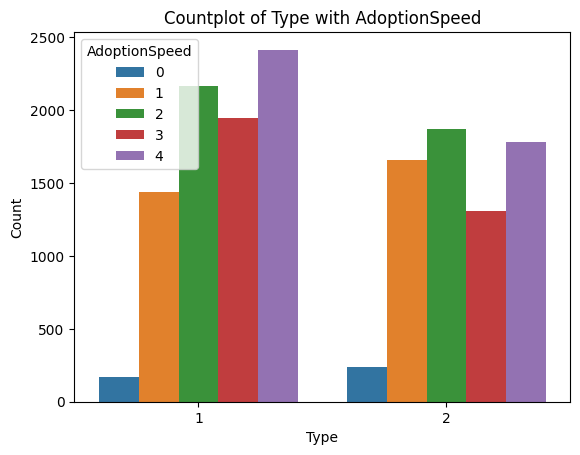

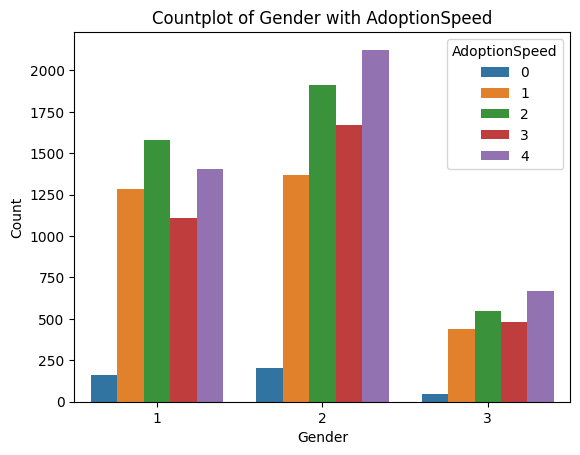

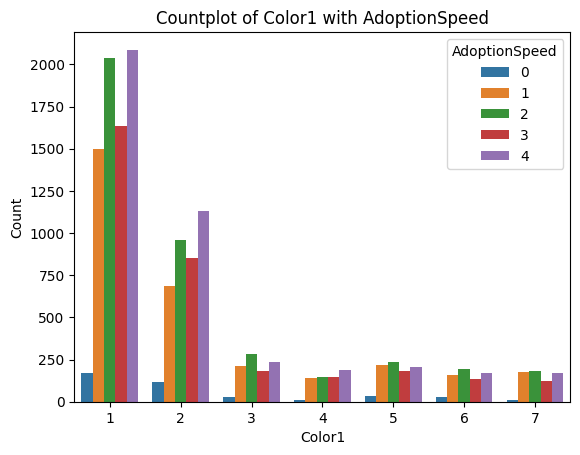

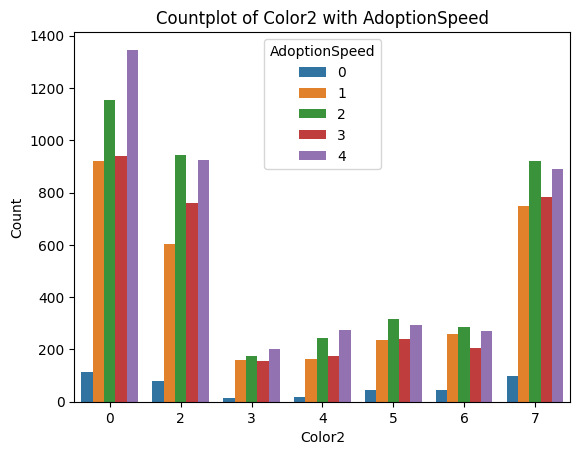

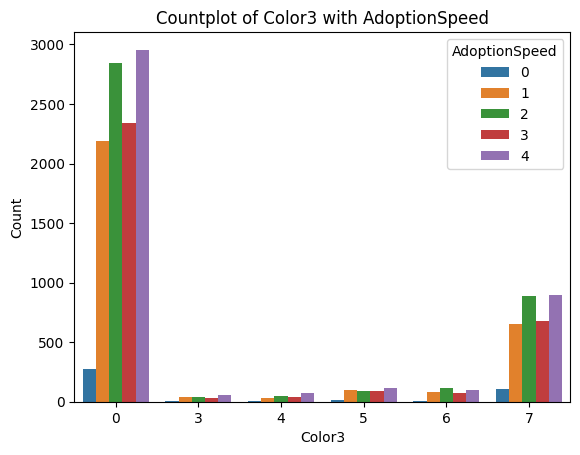

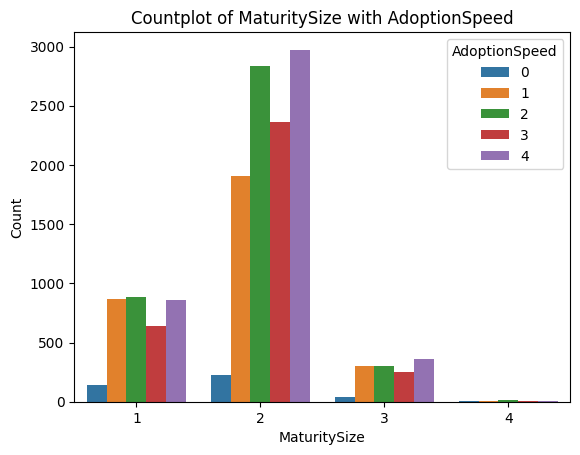

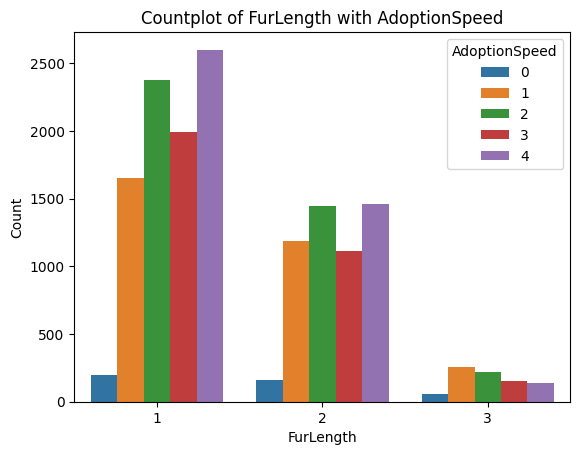

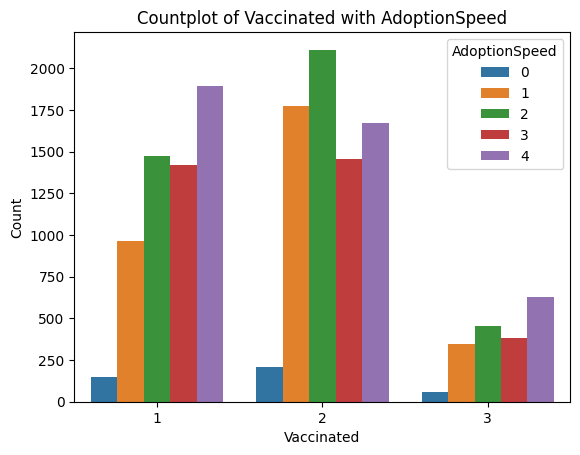

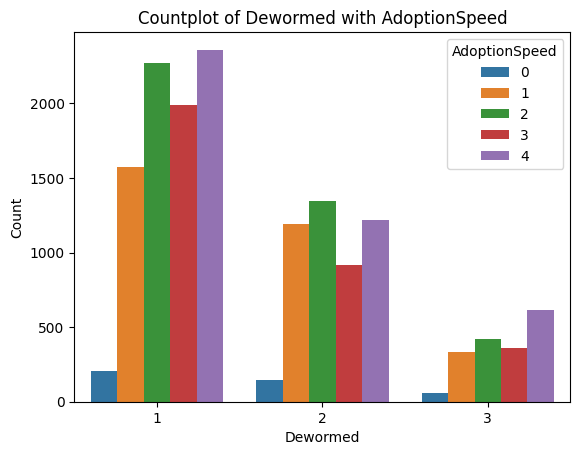

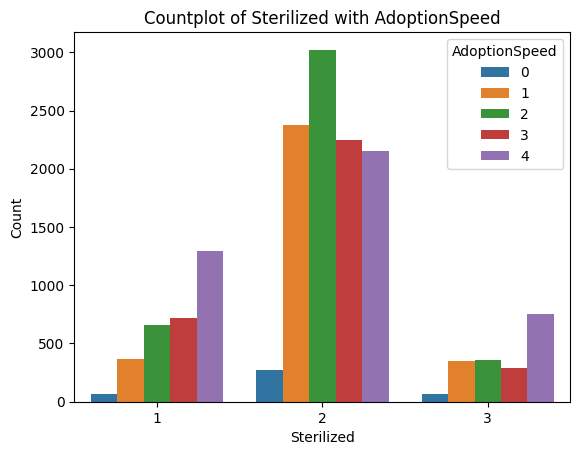

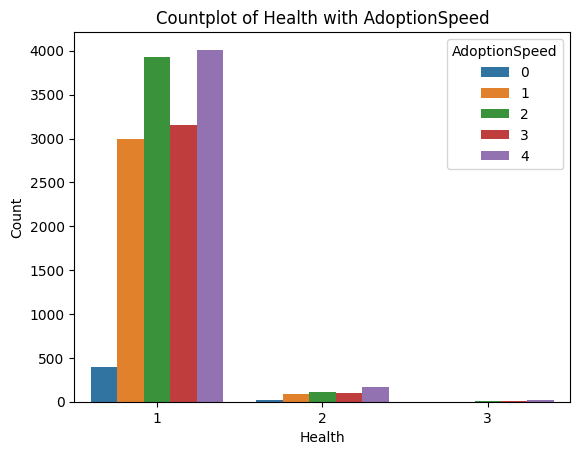

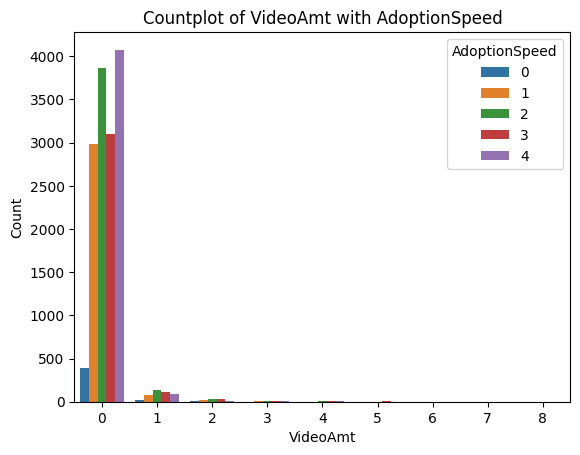

In [12]:
for column in pet_df_plot_show.columns:
    if column != 'AdoptionSpeed':  # Exclude the target variable
        sns.countplot(data=pet_df_cp, x=column, hue='AdoptionSpeed')
        plt.title(f'Countplot of {column} with AdoptionSpeed')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

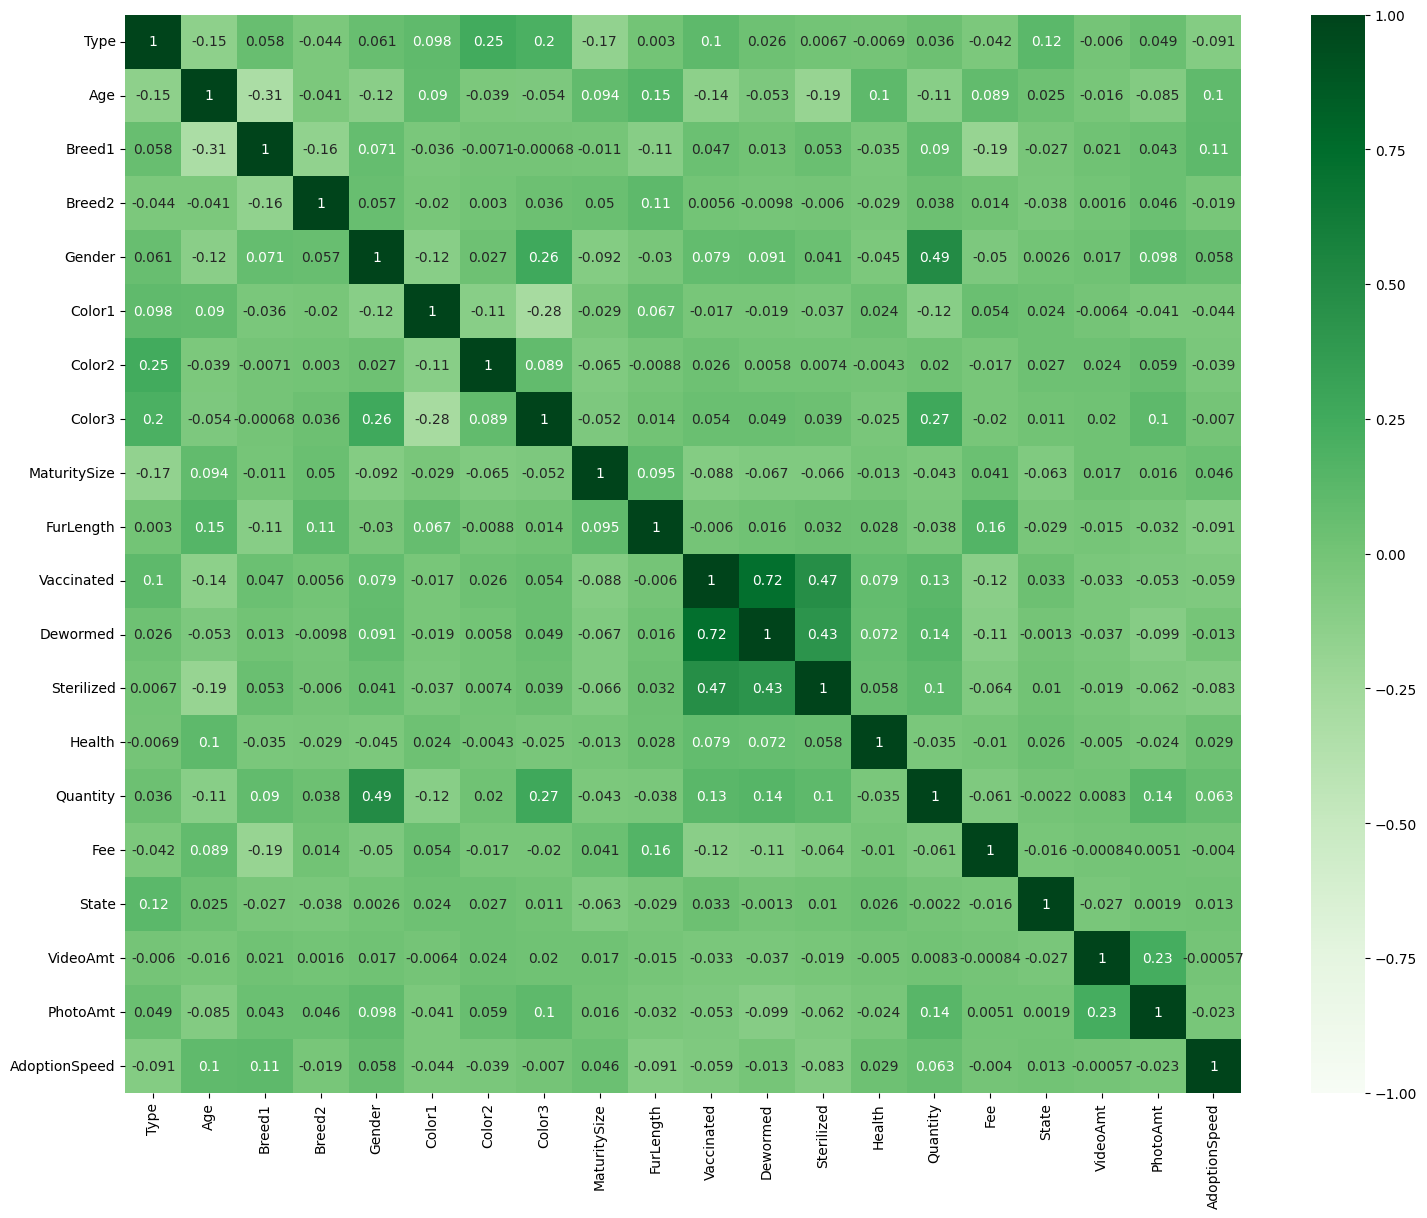

In [13]:
# show absolute correlation between features in a heatmap
plt.figure(figsize=(18,14))
cor = pet_df_cp.corr()
sns.heatmap(cor, annot=True,
            cmap=plt.cm.Greens, vmin=-1, vmax=1)
plt.show()

As you can see we have way too many features to make descions over them, and so we will use some functions to make these desicions for us.

In [14]:
test_df = pd.read_csv("/kaggle/input/petfinder-adoption-prediction/test/test.csv")
test_df.reset_index(drop=True, inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3972 entries, 0 to 3971
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          3972 non-null   int64  
 1   Name          3558 non-null   object 
 2   Age           3972 non-null   int64  
 3   Breed1        3972 non-null   int64  
 4   Breed2        3972 non-null   int64  
 5   Gender        3972 non-null   int64  
 6   Color1        3972 non-null   int64  
 7   Color2        3972 non-null   int64  
 8   Color3        3972 non-null   int64  
 9   MaturitySize  3972 non-null   int64  
 10  FurLength     3972 non-null   int64  
 11  Vaccinated    3972 non-null   int64  
 12  Dewormed      3972 non-null   int64  
 13  Sterilized    3972 non-null   int64  
 14  Health        3972 non-null   int64  
 15  Quantity      3972 non-null   int64  
 16  Fee           3972 non-null   int64  
 17  State         3972 non-null   int64  
 18  RescuerID     3972 non-null 

Read the test.csv to prepare for later when we want to try different submissions

In [15]:
test_cp = test_df.copy().drop(['Name', 'RescuerID', 'PetID', 'Description'], axis=1)
#Transform the dataframe to be similar to the train dataframe
test_normalized = StandardScaler().fit_transform(test_cp)
test_normalized

array([[ 1.05914818, -0.1880848 ,  0.03936913, ..., -0.64496252,
        -0.14058698, -0.48675619],
       [ 1.05914818,  1.41237726,  0.35480699, ..., -0.64496252,
        -0.14058698, -0.78324378],
       [ 1.05914818, -0.53104096,  0.02276713, ..., -0.64496252,
        -0.14058698,  0.10621899],
       ...,
       [ 1.05914818, -0.35956288,  0.60383689, ...,  1.63040529,
        -0.14058698, -0.78324378],
       [-0.94415495,  0.72646495,  0.72005084, ..., -0.67530075,
        -0.14058698, -0.1902686 ],
       [ 1.05914818, -0.58820032,  0.03936913, ..., -0.64496252,
        -0.14058698, -0.78324378]])

t = pet_df_cp['AdoptionSpeed'].copy()
X = pet_df_cp.drop(['AdoptionSpeed'], axis=1)

#X_train, X_test, t_train, t_test =\
 #sklearn.model_selection.train_test_split(
  #  X, t, test_size=0.2, random_state=1)
    
clf = GradientBoostingClassifier(n_estimators=100, random_state=1).fit(X, t)

print(clf.score(X_test, t_test))

# Predict the target values on the test set
predictions = clf.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(t_test, predictions)
print("Mean Squared Error:", mse)

In [16]:
t = pet_df_cp['AdoptionSpeed'].copy() 
X = pet_df_cp.drop(['AdoptionSpeed'], axis=1)


X_normalized = StandardScaler().fit_transform(X)


print(X_normalized)
print(t)

[[ 1.08869186 -0.41046553  0.56161035 ... -0.61733819 -0.16396374
  -0.82840267]
 [ 1.08869186 -0.5206269  -0.00453908 ...  1.69440351 -0.16396374
  -0.54168026]
 [-0.91853355 -0.5206269   0.69482199 ... -0.61733819 -0.16396374
   0.89193177]
 ...
 [ 1.08869186 -0.46554622 -0.00453908 ... -0.61733819 -0.16396374
   0.31848696]
 [ 1.08869186 -0.07998143  0.01211237 ... -0.30910596 -0.16396374
  -0.25495786]
 [-0.91853355 -0.5206269   0.69482199 ... -0.43239885 -0.16396374
  -0.82840267]]
0        2
1        0
2        3
3        2
4        2
        ..
14988    2
14989    4
14990    3
14991    4
14992    3
Name: AdoptionSpeed, Length: 14993, dtype: int64


Normalized features to not give extra weight because of higher values.

In [17]:
>>> from sklearn.datasets import make_hastie_10_2
>>> from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
import xgboost as xgb


xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42, n_estimators = 100)


In [18]:
from tqdm.auto import tqdm

def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length',
                    ncols=1000,
                    bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

In [19]:
# calculate score and loss from cv (KFold or LPO) and display graphs
import plotly.express as px
from sklearn.model_selection import KFold


def get_cv_score_and_loss(X, t, model, transformer=None,
                          k=None, p=None,
                          show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=42)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc='Computing Models',
                    total=find_generator_len(cv.split(X)))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] =\
         [i, 'train', model.score(X_train, t_train),
          mean_squared_error(t_train, y_train)]
        scores_losses_df.loc[len(scores_losses_df)] =\
         [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss,\
     mean_train_score, mean_train_loss

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_df_cp.drop('AdoptionSpeed', axis = 1)
t = pet_df_cp['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, xgb.XGBClassifier(objective="multi:softprob", n_estimators = 100, random_state = 1))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.40
mean cv val loss 1.79


n_estimators = 100:

Score: 0.45027679583805774

Mean Squared Error: 1.6765824051223905

n_estimaros = 1000 :

Score: 0.5755352497832322

Mean Squared Error: 1.2908023744414059

Submissions:
100_estimators, no feature selection :   

In [21]:
#submission = test_df[["PetID"]]
#submission["AdoptionSpeed"] = test_predictions
#submission

In [22]:
#submission.to_csv("submission.csv", index = False)

In [23]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_df_cp.drop('AdoptionSpeed', axis = 1)
t = pet_df_cp['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, RandomForestClassifier(n_estimators=100, random_state=1))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.40
mean cv val loss 1.84


100_estimators:

Accuracy on train:
0.9848257462064366

Accuracy on test:
0.41380460153384463

In [24]:
# run KNN on the dataset and find best K by accuracy
from sklearn.neighbors import KNeighborsClassifier

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_df_cp.drop('AdoptionSpeed', axis = 1)
t = pet_df_cp['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, KNeighborsClassifier(n_neighbors=5))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.32
mean cv val loss 2.21


In [25]:
# def plot_accuracy_and_ce_scores(KNN_score, randomForest_score, xgb_score, ce_knn, ce_rf, ce_xgb):
#     models = ['KNN', 'Random Forest', 'XGBoost']
#     accuracy_scores = [KNN_score, randomForest_score, xgb_score]
#     ce_scores = [ce_knn, ce_rf, ce_xgb]

#     # Plot Accuracy Scores
#     plt.figure(figsize=(10, 6))
#     plt.bar(models, accuracy_scores, color=['lightblue', 'purple', 'pink'])
#     plt.xlabel('Models')
#     plt.ylabel('Accuracy Score')
#     plt.title('Accuracy Scores of Different Models')
#     plt.ylim(0, 1)  # Assuming accuracy scores are in the range [0, 1]
#     plt.show()

#     # Plot Accuracy Scores
#     plt.figure(figsize=(10, 6))
#     plt.bar(models, ce_scores, color=['lightblue', 'purple', 'pink'])
#     plt.xlabel('Models')
#     plt.ylabel('CE')
#     plt.title('CE of Different Models')
#     plt.ylim(0, 5)  # Assuming accuracy scores are in the range [0, 1]
#     plt.show()


# # Assuming you have values for ce_xgb, ce_rf, and ce_knn
# plot_accuracy_and_ce_scores(KNN_score, randomForest_score, xgb_score, ce_knn, ce_rf, ce_xgb)

# **Feature Selection**

In [26]:
# find best subset of features on this dataset
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.compose import ColumnTransformer
X = pet_df_cp.drop('AdoptionSpeed', axis = 1)
t = pet_df_cp['AdoptionSpeed']

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

ct_enc_std = ColumnTransformer([
            ("standard", StandardScaler(), numerical_cols)])
X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=numerical_cols)


selector = RFECV(
    xgb.XGBClassifier(objective="multi:softprob", n_estimators = 100),
    cv=RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    ).fit(X_encoded, t)

print(selector.feature_names_in_)
print(selector.ranking_)
print(selector.support_)
selector.get_feature_names_out()

['Type' 'Age' 'Breed1' 'Breed2' 'Gender' 'Color1' 'Color2' 'Color3'
 'MaturitySize' 'FurLength' 'Vaccinated' 'Dewormed' 'Sterilized' 'Health'
 'Quantity' 'Fee' 'State' 'VideoAmt' 'PhotoAmt']
[1 1 1 1 1 2 4 3 1 1 1 1 1 1 1 1 1 5 1]
[ True  True  True  True  True False False False  True  True  True  True
  True  True  True  True  True False  True]


array(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health',
       'Quantity', 'Fee', 'State', 'PhotoAmt'], dtype=object)

['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health',
       'Quantity', 'Fee', 'State', 'PhotoAmt']

In [27]:
print(selector.ranking_)
selector.get_feature_names_out()

[1 1 1 1 1 2 4 3 1 1 1 1 1 1 1 1 1 5 1]


array(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health',
       'Quantity', 'Fee', 'State', 'PhotoAmt'], dtype=object)

In [28]:
num_selected_features = sum(selector.support_)
mask = selector.get_support()
features = np.array(X.columns)
best_features = X.columns[mask]

print("All features: ", X.shape[1])
print(features)

print("Number of selected features:", num_selected_features)
print(selector.get_feature_names_out())

All features:  19
['Type' 'Age' 'Breed1' 'Breed2' 'Gender' 'Color1' 'Color2' 'Color3'
 'MaturitySize' 'FurLength' 'Vaccinated' 'Dewormed' 'Sterilized' 'Health'
 'Quantity' 'Fee' 'State' 'VideoAmt' 'PhotoAmt']
Number of selected features: 15
['Type' 'Age' 'Breed1' 'Breed2' 'Gender' 'MaturitySize' 'FurLength'
 'Vaccinated' 'Dewormed' 'Sterilized' 'Health' 'Quantity' 'Fee' 'State'
 'PhotoAmt']


In [29]:
X_selected = X[best_features]
#selector.get_feature_names_out()
X_selected = X.loc[:, selector.get_feature_names_out()]
X_selected.columns

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health',
       'Quantity', 'Fee', 'State', 'PhotoAmt'],
      dtype='object')

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
numerical_cols = X_selected.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_selected.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X_selected.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, xgb.XGBClassifier(objective="multi:softprob", n_estimators = 100))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X_selected, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.41
mean cv val loss 1.78


In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
numerical_cols = X_selected.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_selected.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X_selected.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, RandomForestClassifier(n_estimators=100, random_state=1))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X_selected, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.39
mean cv val loss 1.88


In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
numerical_cols = X_selected.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_selected.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X_selected.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, KNeighborsClassifier(n_neighbors=5))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X_selected, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.33
mean cv val loss 2.15


So far it seems that normal feature selection didn't give much improvement, this is fine because we reduce dimensions, with so many columns it can help trying some more expensive algorithms.

We will only try feature selection on KNN since random forest and XGB don't have any scoring attributes, which makes it impossible to do feature selection using them without further knowledge.

We will try to select features using advanced correlation picking.

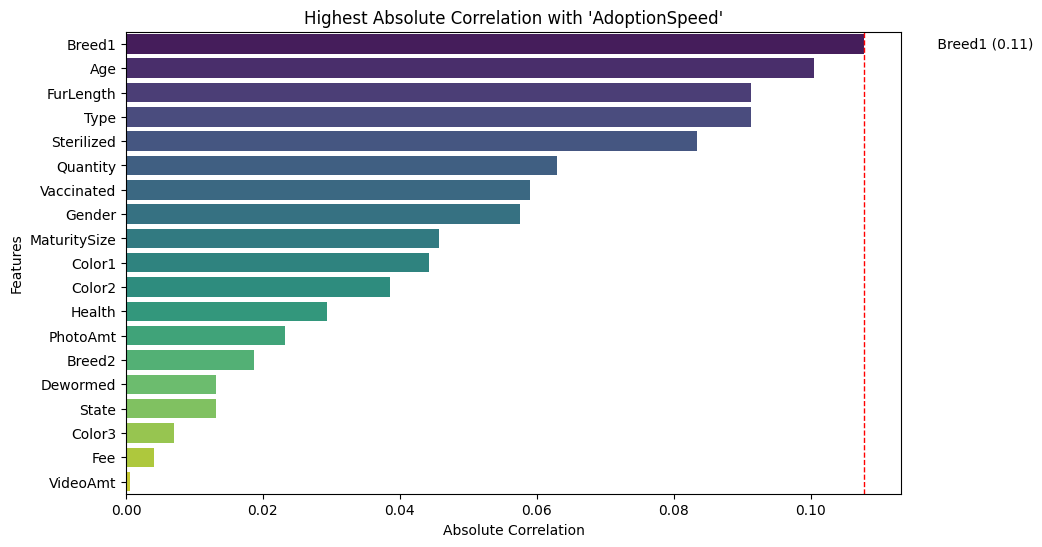

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_highest_correlation(df, target_feature):
    # Calculate correlation matrix
    cor = df.corr()
    
    # Find the feature with the highest absolute correlation with the target feature
    highest_corr = cor[target_feature].drop(target_feature).abs().idxmax()
    highest_corr_value = cor[target_feature].drop(target_feature).abs().max()
    
    # Sort features based on absolute correlation values
    sorted_correlation = cor[target_feature].drop(target_feature).abs().sort_values(ascending=False)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=sorted_correlation.values, y=sorted_correlation.index, palette="viridis")
    plt.xlabel('Absolute Correlation')
    plt.ylabel('Features')
    plt.title(f"Highest Absolute Correlation with '{target_feature}'")
    plt.axvline(x=highest_corr_value, color='r', linestyle='--', linewidth=1)
    plt.text(highest_corr_value + 0.01, 0, f' {highest_corr} ({highest_corr_value:.2f})', verticalalignment='center')
    plt.show()

# Example usage:
plot_highest_correlation(pet_df_cp, 'AdoptionSpeed')

In [34]:
def remove_low_correlation_features(df, target_feature, threshold=0.02):
    # Calculate correlation matrix
    cor = df.corr()
    
    # Find features with correlation less than threshold
    low_correlation_features = cor[target_feature][cor[target_feature].abs() < threshold].index
    
    # Remove low correlation features from DataFrame
    df_filtered = df.drop(low_correlation_features, axis=1)
    
    return df_filtered

# Example usage:
pet_df_filtered = remove_low_correlation_features(pet_df_cp, 'AdoptionSpeed', threshold=0.02)
pet_df_filtered

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Quantity,PhotoAmt,AdoptionSpeed
0,2,3,299,1,1,7,1,1,2,2,1,1,1.0,2
1,2,1,265,1,1,2,2,2,3,3,1,1,2.0,0
2,1,1,307,1,2,7,2,2,1,2,1,1,7.0,3
3,1,4,307,2,1,2,2,1,1,2,1,1,8.0,2
4,1,1,307,1,1,0,2,1,2,2,1,1,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,2,266,3,1,0,2,2,2,2,1,4,3.0,2
14989,2,60,265,3,1,4,2,2,1,1,1,2,3.0,4
14990,2,2,265,3,5,6,3,2,2,3,1,5,5.0,3
14991,2,9,266,2,4,7,1,1,1,1,1,1,3.0,4


In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_df_filtered.drop('AdoptionSpeed', axis = 1)
t = pet_df_filtered['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, xgb.XGBClassifier(objective="multi:softprob", n_estimators = 100, random_state = 1))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.39
mean cv val loss 1.83


In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_df_filtered.drop('AdoptionSpeed', axis = 1)
t = pet_df_filtered['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, RandomForestClassifier(n_estimators=100, random_state=1))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.37
mean cv val loss 2.00


In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_df_filtered.drop('AdoptionSpeed', axis = 1)
t = pet_df_filtered['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, KNeighborsClassifier(n_neighbors=5))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.32
mean cv val loss 2.22


From all the modules XGB  still performed the best with removal of low correlation features.

In [38]:
def high_correlation_pairs(df, threshold=0.3):
    # Calculate correlation matrix
    cor = df.corr().abs()
    
    # Find pairs of features with correlation greater than threshold
    high_correlation_pairs = []
    for i in range(len(cor.columns)):
        for j in range(i):
            if cor.iloc[i, j] > threshold:
                high_correlation_pairs.append((cor.index[i], cor.columns[j], cor.iloc[i, j]))
    
    return high_correlation_pairs

# Example usage:
high_corr_pairs = high_correlation_pairs(pet_df_cp, threshold=0.3)
for pair in high_corr_pairs:
     print(f"Features '{pair[0]}' and '{pair[1]}' have a correlation of {pair[2]:.2f}")


Features 'Breed1' and 'Age' have a correlation of 0.31
Features 'Dewormed' and 'Vaccinated' have a correlation of 0.72
Features 'Sterilized' and 'Vaccinated' have a correlation of 0.47
Features 'Sterilized' and 'Dewormed' have a correlation of 0.43
Features 'Quantity' and 'Gender' have a correlation of 0.49


In [39]:
pet_df_pair_corr = pet_df_cp.copy()

# Multiply 'Breed1' with 'Age' and handle categorical values
pet_df_pair_corr['Breed1_Age'] = (pet_df_pair_corr['Breed1'] + 1) * pet_df_pair_corr['Age']

# Multiply all 'Dewormed', 'Vaccinated', 'Sterilized' with each other
pet_df_pair_corr['Dewormed_Vaccinated_Sterilized'] = (pet_df_pair_corr['Dewormed']) + (pet_df_pair_corr['Vaccinated']) + (pet_df_pair_corr['Sterilized'])

# Multiply 'Quantity' with 'Gender' and handle categorical values
pet_df_pair_corr['Quantity_Gender'] = (pet_df_pair_corr['Quantity']) * (pet_df_pair_corr['Gender'] + 1)

# Display the modified DataFrame
pet_df_filtered = pet_df_pair_corr.drop(['Breed1', 'Age', 'Quantity', 'Gender', 'Dewormed', 'Vaccinated', 'Sterilized'], axis = 1)
pet_df_filtered


,Type,Breed2,Color1,Color2,Color3,MaturitySize,FurLength,Health,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed,Breed1_Age,Dewormed_Vaccinated_Sterilized,Quantity_Gender
0,2,0,1,7,0,1,1,1,100,41326,0,1.0,2,900,6,2
1,2,0,1,2,0,2,2,1,0,41401,0,2.0,0,266,9,2
2,1,0,2,7,0,2,2,1,0,41326,0,7.0,3,308,4,2
3,1,0,1,2,0,2,1,1,150,41401,0,8.0,2,1232,4,3
4,1,0,1,0,0,2,1,1,0,41326,0,3.0,2,308,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,0,1,0,0,2,2,1,0,41326,0,3.0,2,534,6,16
14989,2,264,1,4,7,2,2,1,0,41326,0,3.0,4,15960,3,8
14990,2,266,5,6,7,3,2,1,30,41326,0,5.0,3,532,6,20
14991,2,0,4,7,0,1,1,1,0,41336,0,3.0,4,2403,3,3


In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_df_filtered.drop('AdoptionSpeed', axis = 1)
t = pet_df_filtered['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, xgb.XGBClassifier(objective="multi:softprob", n_estimators = 100, random_state = 1))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.39
mean cv val loss 1.88


In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_df_filtered.drop('AdoptionSpeed', axis = 1)
t = pet_df_filtered['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, RandomForestClassifier(n_estimators=100, random_state=1))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.38
mean cv val loss 1.94


In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_df_filtered.drop('AdoptionSpeed', axis = 1)
t = pet_df_filtered['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, KNeighborsClassifier(n_neighbors=10))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.32
mean cv val loss 2.25


In [43]:
pet_df_pair_corr = pet_df_cp.copy()
pet_df_pair_corr['Dewormed_Vaccinated_Sterilized'] = (pet_df_pair_corr['Dewormed']) + (pet_df_pair_corr['Vaccinated']) + (pet_df_pair_corr['Sterilized'])
pet_df_filtered = pet_df_pair_corr.drop(['Dewormed', 'Vaccinated', 'Sterilized'], axis = 1)


In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_df_filtered.drop('AdoptionSpeed', axis = 1)
t = pet_df_filtered['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, xgb.XGBClassifier(objective="multi:softprob", n_estimators = 100, random_state = 1))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.40
mean cv val loss 1.79


In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_df_filtered.drop('AdoptionSpeed', axis = 1)
t = pet_df_filtered['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, RandomForestClassifier(n_estimators=100, random_state=1))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.40
mean cv val loss 1.86


In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_df_filtered.drop('AdoptionSpeed', axis = 1)
t = pet_df_filtered['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, KNeighborsClassifier(n_neighbors=10))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.32
mean cv val loss 2.16


We tested all algorithms while dropping and merging some of the features, it seems like it was still worse than the original, for random forest classifier we got a better prediction than normal merging some of the features.

In [47]:
pet_df_cp['RescuerID'] = pet_df['RescuerID']
#pet_df_cp.drop('RescuerID_Binned', axis = 1)

In [48]:
def bin_rescuerid_count(df):
    # Group by RescuerID and count the number of occurrences
    rescuerid_counts = df.groupby('RescuerID').size()
    
    # Bin the rescuerid counts into 10 quantile bins
    quantile_bins = pd.qcut(rescuerid_counts, q=10, labels=False, duplicates='drop')
    
    # Merge quantile bins back into the DataFrame based on RescuerID
    df['RescuerID_Bin'] = df['RescuerID'].map(quantile_bins)
    
    return df

# Apply the function to your DataFrame
pet_df_cp = bin_rescuerid_count(pet_df_cp)

In [49]:
# pet_df_cp = pet_df_cp.drop(['RescuerID_Bin', 'RescuerID'], axis = 1)
# pet_df_cp

In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_df_cp.drop('AdoptionSpeed', axis = 1)
t = pet_df_cp['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, xgb.XGBClassifier(objective="multi:softprob", n_estimators = 100, random_state = 1))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

bestXGB = f"{val_score:.2f}"

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to 

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.45
mean cv val loss 1.71


In [92]:
bestXGB

'0.45'

In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_df_cp.drop('AdoptionSpeed', axis = 1)
t = pet_df_cp['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, RandomForestClassifier(n_estimators=100, random_state=1))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

bestRFC = f"{val_score:.2f}"

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to 

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.46
mean cv val loss 1.67


In [94]:
bestRFC

'0.46'

In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_df_cp.drop('AdoptionSpeed', axis = 1)
t = pet_df_cp['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, KNeighborsClassifier(n_neighbors=10))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

bestKNN = f"{val_score:.2f}"

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to 

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.36
mean cv val loss 2.04


In [96]:
bestKNN

'0.36'

In [53]:
pet_df_pair_corr = pet_df_cp.copy()
pet_df_pair_corr['Dewormed_Vaccinated_Sterilized'] = (pet_df_pair_corr['Dewormed']) * (pet_df_pair_corr['Vaccinated']) * (pet_df_pair_corr['Sterilized'])
pet_df_filtered = pet_df_pair_corr.drop(['Dewormed', 'Vaccinated', 'Sterilized'], axis = 1)


In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_df_filtered.drop('AdoptionSpeed', axis = 1)
t = pet_df_filtered['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, xgb.XGBClassifier(objective="multi:softprob", n_estimators = 100, random_state = 1))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to 

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.45
mean cv val loss 1.73


In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_df_filtered.drop('AdoptionSpeed', axis = 1)
t = pet_df_filtered['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, RandomForestClassifier(n_estimators=100, random_state=1))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to 

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.45
mean cv val loss 1.71


In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_df_filtered.drop('AdoptionSpeed', axis = 1)
t = pet_df_filtered['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, KNeighborsClassifier(n_neighbors=10))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to 

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.35
mean cv val loss 2.08


Again reducing the features didn't help the prediction

We tried many combinations for example age*breed1 or age+breed1 and quantity*gender or quantity*gender, in the end the only thing that improved our score was dewormed*sterilized*vaccinated

In [58]:
X = pet_df_cp.drop(['AdoptionSpeed', 'RescuerID'], axis = 1)
t = pet_df_cp['AdoptionSpeed']
X

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,RescuerID_Bin
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,1.0,2
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,2.0,0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,7.0,2
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,8.0,2
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,2,266,0,3,1,0,0,2,2,2,2,2,1,4,0,41326,0,3.0,1
14989,2,60,265,264,3,1,4,7,2,2,1,1,1,1,2,0,41326,0,3.0,1
14990,2,2,265,266,3,5,6,7,3,2,2,1,3,1,5,30,41326,0,5.0,2
14991,2,9,266,0,2,4,7,0,1,1,1,1,1,1,1,0,41336,0,3.0,2


In [59]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
# Define the XGBoost classifier
xgb_model = XGBClassifier()

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [None ,0.01, 0.1],
    'max_depth': [None ,3, 5],
    'n_estimators': range(100, 1001, 100),
}

# Define the Random Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Perform the Random Search
grid_search.fit(X, t)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 600}


Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 600}

In [60]:
X = pet_df_cp.drop(['AdoptionSpeed', 'RescuerID'], axis = 1)
t = pet_df_cp['AdoptionSpeed']
X

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,RescuerID_Bin
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,1.0,2
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,2.0,0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,7.0,2
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,8.0,2
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,2,266,0,3,1,0,0,2,2,2,2,2,1,4,0,41326,0,3.0,1
14989,2,60,265,264,3,1,4,7,2,2,1,1,1,1,2,0,41326,0,3.0,1
14990,2,2,265,266,3,5,6,7,3,2,2,1,3,1,5,30,41326,0,5.0,2
14991,2,9,266,0,2,4,7,0,1,1,1,1,1,1,1,0,41336,0,3.0,2


In [61]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest classifier
rf_model = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': range(100, 1001, 200),  # Number of trees in the forest
    'max_depth': [None, 3, 5],  # Maximum depth of each tree
    'min_samples_split': [5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2, 4]  # Minimum number of samples required to be at a leaf node
}

# Define the Grid Search with 5-fold stratified cross-validation
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Use StratifiedKFold for classification
)

# Perform the Grid Search
grid_search.fit(X, t)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 900}


In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_df_cp.drop('AdoptionSpeed', axis = 1)
t = pet_df_cp['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, RandomForestClassifier(n_estimators=900, max_depth = None, min_samples_leaf = 2,min_samples_split = 10, random_state=1))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to 

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.42
mean cv val loss 2.01


Hyper parameter search for Random forest didnt give very promising results, this could be a result of the gridsearch function using a different scoring system than we do, and so gives different parameters more value.

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 900}

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_df_cp.drop('AdoptionSpeed', axis = 1)
t = pet_df_cp['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, xgb.XGBClassifier(objective="multi:softprob", n_estimators = 600, max_depth = 3, learning_rate = 0.1, random_state = 1))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to 

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.44
mean cv val loss 1.74


In [64]:
# convert data points to 2dim with pca
from sklearn.decomposition import PCA

X = pet_df_cp.drop('AdoptionSpeed', axis = 1)
t = pet_df_cp['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

ct_enc_std = ColumnTransformer([
            ("standard", StandardScaler(), numerical_cols)])
X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=numerical_cols)

pca = PCA(n_components=10).fit(X_encoded)
pet_pca = pd.DataFrame(
    pca.transform(X_encoded),)
pet_pca

,0,1,2,3,4,5,6,7,8,9
0,0.536404,-0.501733,-1.358172,-1.382838,0.839818,-1.297243,-0.360896,0.581554,1.180915,1.269173
1,2.394114,-2.768672,-0.088080,-0.924268,0.379469,-0.041348,-0.372719,0.490143,0.439998,-2.093513
2,-1.301655,0.499577,-1.323362,0.422929,1.012525,-0.501943,-0.572302,0.970967,-0.364655,0.129195
3,-1.126866,1.029495,-0.785074,0.316769,-0.243302,0.482044,-0.045315,0.009009,0.729595,-1.498756
4,-0.026942,-0.917646,-1.875049,1.369937,-0.548789,-0.236373,-0.601986,0.112910,0.560839,-0.014054
...,...,...,...,...,...,...,...,...,...,...
14988,1.628160,0.488246,0.608849,0.712016,-0.961484,0.300968,1.050866,0.894993,-0.483318,0.119190
14989,-0.946566,2.045412,2.825535,-0.143103,-0.385221,-0.861423,-0.143322,-0.232775,-1.242007,0.558658
14990,1.867857,1.571194,1.526644,1.171525,1.388170,-0.396587,1.798560,0.754637,-1.953060,-0.427311
14991,-1.204463,1.193378,-1.125699,-2.089724,0.110645,-0.330439,0.669114,-0.411362,-0.015134,1.575337


In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_pca
t = pet_df_cp['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, xgb.XGBClassifier(objective="multi:softprob", n_estimators = 600, max_depth = 3, learning_rate = 0.1, random_state = 1))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.37
mean cv val loss 2.12


In [66]:
# convert data points to 2dim with pca
from sklearn.decomposition import PCA
X = pet_df_cp.drop('AdoptionSpeed', axis = 1)
t = pet_df_cp['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

ct_enc_std = ColumnTransformer([
            ("standard", StandardScaler(), numerical_cols)])
X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=numerical_cols)

pca = PCA(n_components=15).fit(X_encoded)
pet_pca = pd.DataFrame(
    pca.transform(X_encoded),)
pet_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.536404,-0.501733,-1.358172,-1.382838,0.839818,-1.297243,-0.360896,0.581554,1.180915,1.269173,0.622241,-0.468049,0.276794,-0.372789,0.410885
1,2.394114,-2.768672,-0.088080,-0.924268,0.379469,-0.041348,-0.372719,0.490143,0.439998,-2.093513,0.107227,0.816587,-0.145575,-0.070541,-0.483068
2,-1.301655,0.499577,-1.323362,0.422929,1.012525,-0.501943,-0.572302,0.970967,-0.364655,0.129195,0.002181,-0.415130,0.221408,-1.196963,-1.177927
3,-1.126866,1.029495,-0.785074,0.316769,-0.243302,0.482044,-0.045315,0.009009,0.729595,-1.498756,2.294524,-0.807760,0.609123,-0.401504,-0.314124
4,-0.026942,-0.917646,-1.875049,1.369937,-0.548789,-0.236373,-0.601986,0.112910,0.560839,-0.014054,0.441793,-0.042541,-0.459178,0.377643,-0.043496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,1.628160,0.488246,0.608849,0.712016,-0.961484,0.300968,1.050866,0.894993,-0.483318,0.119190,-0.269849,-0.184735,-0.309792,-0.162098,0.328994
14989,-0.946566,2.045412,2.825535,-0.143103,-0.385221,-0.861423,-0.143322,-0.232775,-1.242007,0.558658,-1.519422,0.164372,-1.071574,0.023443,0.563676
14990,1.867857,1.571194,1.526644,1.171525,1.388170,-0.396587,1.798560,0.754637,-1.953060,-0.427311,-0.851977,-0.593933,0.990329,0.928355,0.680306
14991,-1.204463,1.193378,-1.125699,-2.089724,0.110645,-0.330439,0.669114,-0.411362,-0.015134,1.575337,-0.426098,-1.054698,-0.061908,-0.503957,0.565693


In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_pca
t = pet_df_cp['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, xgb.XGBClassifier(objective="multi:softprob", n_estimators = 600, max_depth = 3, learning_rate = 0.1, random_state = 1))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.38
mean cv val loss 2.08


In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_pca
t = pet_df_cp['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, RandomForestClassifier(n_estimators=100, random_state=1))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.38
mean cv val loss 2.03


In [69]:
# convert data points to 2dim with pca
from sklearn.decomposition import PCA
X = pet_df_cp.drop('AdoptionSpeed', axis = 1)
t = pet_df_cp['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

ct_enc_std = ColumnTransformer([
            ("standard", StandardScaler(), numerical_cols)])
X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=numerical_cols)

pca = PCA(n_components=5).fit(X_encoded)
pet_pca = pd.DataFrame(
    pca.transform(X_encoded),)
pet_pca

,0,1,2,3,4
0,0.536411,-0.500489,-1.355756,-1.386770,0.835449
1,2.395121,-2.761429,-0.090736,-0.928294,0.354386
2,-1.300985,0.505181,-1.330380,0.422213,0.985466
3,-1.125809,1.035963,-0.790177,0.314316,-0.274506
4,-0.026893,-0.916440,-1.873355,1.367980,-0.551402
...,...,...,...,...,...
14988,1.629278,0.496502,0.610321,0.705242,-0.979716
14989,-0.947312,2.038586,2.831363,-0.142255,-0.359347
14990,1.867217,1.565666,1.525175,1.174341,1.395390
14991,-1.204594,1.192645,-1.124341,-2.089844,0.115556


In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
# determine categorical and numerical features
#copying the dataset into X for further use
X = pet_pca
t = pet_df_cp['AdoptionSpeed']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, xgb.XGBClassifier(objective="multi:softprob", n_estimators = 600, max_depth = 3, learning_rate = 0.1, random_state = 1))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X, t,
                       model_pipe, transformer=ct,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.36
mean cv val loss 2.17


We tried 3 different PCA's, 5,10 and 15, they all returned worse predictions which indicates further that this dataset is too complicated to emit any information from the data, as we've seen with feature selection attempts.

We attempted only PCA 15 for random forest because of time constraints and we assume that since its quite similar to XGB we wouldn't get better results than 15 since on XGB pca 15 received the best score.

In [120]:
bestXGB = float(bestXGB)
bestRFC = float(bestRFC)
bestKNN = float(bestKNN)

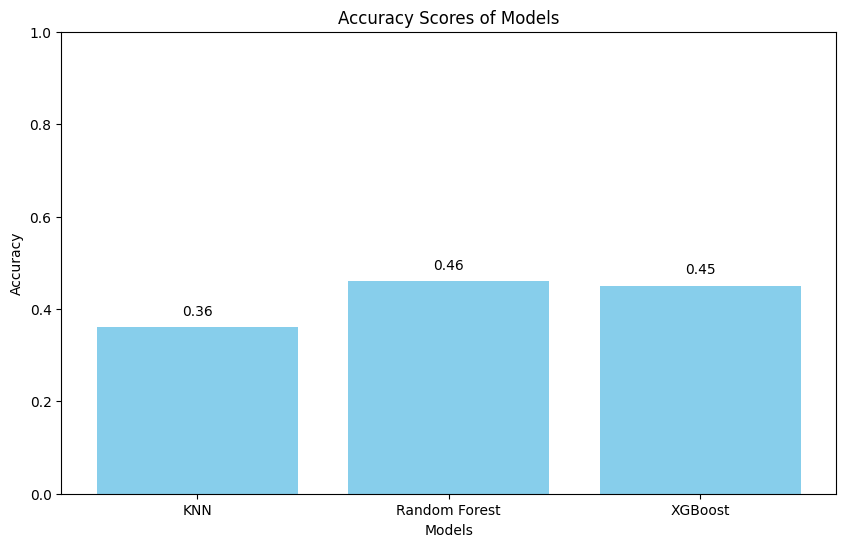

In [121]:
def plot_accuracy_and_ce_scores(bestKNN, bestRFC, bestXGB):
    # Names of the models
    model_names = ['KNN', 'Random Forest', 'XGBoost']
    
    # Accuracy scores for the models
    accuracy_scores = [bestKNN, bestRFC, bestXGB]
    
    # Plotting accuracy scores
    plt.figure(figsize=(10, 6))
    plt.bar(model_names, accuracy_scores, color='skyblue')
    plt.title('Accuracy Scores of Models')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for accuracy
    
    # Displaying accuracy scores above the bars
    for i, score in enumerate(accuracy_scores):
        plt.text(i, score + 0.02, score, ha='center', va='bottom')
    
    plt.show()
    
plot_accuracy_and_ce_scores(bestKNN, bestRFC, bestXGB)

In [ ]:
submission = pet_df[[""]]
submission["Survived"] = y_test
submission